<a href="https://colab.research.google.com/github/karsarobert/Deep-Learning-2023/blob/main/03/PTE_DL3_spiral.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Learning gyakorlat


## 3. gyakorlat: tensorflow, osztályozás
### 2023. szeptrember 20.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#Szintetikus adatok előállítása

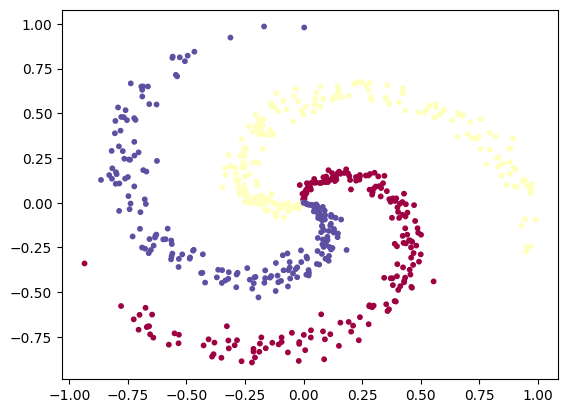

In [2]:
N = 200 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j
# lets visualize the data:
plt.scatter(X[:, 0], X[:, 1], c=y, s=10, cmap=plt.cm.Spectral)
plt.show()

In [6]:
y[190:210] # az osztálycimkéket számok reprezentálják

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=uint8)

#Adatok átalakítása

In [11]:
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf


y= tf.keras.utils.to_categorical(y, 3)

# split into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
# determine the number of input features
n_features = X_train.shape[1]



(402, 2) (198, 2) (402, 3) (198, 3)


#A modell létrehozása

In [12]:
# define model
model = Sequential()
model.add(Dense(50, activation='relu', kernel_initializer='glorot_normal', input_shape=(n_features,)))
model.add(Dense(50, activation='relu', kernel_initializer='glorot_normal'))
model.add(Dense(3, activation='softmax'))
# compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
#model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# fit the model
history = model.fit(X_train, y_train, epochs=150, validation_data=(X_test, y_test), batch_size=32, verbose=0)


#A modell értékelése

Test Accuracy: 0.980
7/7 [==============================] - 0s 4ms/step


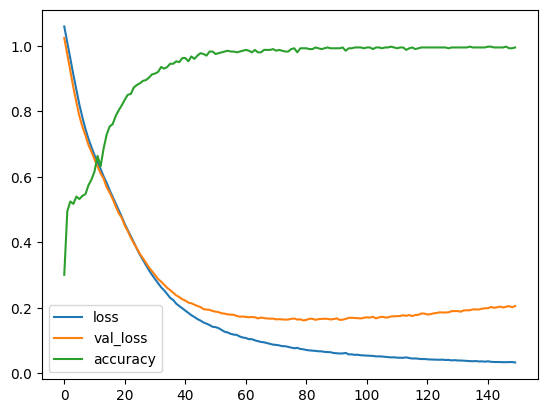

In [13]:
import pandas as pd

# A modell értékelése
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print('Test Accuracy: %.3f' % acc)
z = model.predict(X_test)


# convert the training history to a dataframe
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss','accuracy']].plot();

#A modell kimeneteinek értelmezése

In [ ]:
z[0] #softmax kimenet értelmezése

array([9.040095e-08, 6.457453e-05, 9.999354e-01], dtype=float32)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                150       
                                                                 
 dense_1 (Dense)             (None, 50)                2550      
                                                                 
 dense_2 (Dense)             (None, 3)                 153       
                                                                 
Total params: 2,853
Trainable params: 2,853
Non-trainable params: 0
_________________________________________________________________


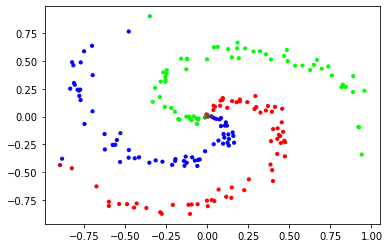

In [ ]:

plt.scatter(X_test[:, 0], X_test[:, 1], c=z, s=10, cmap=plt.cm.Spectral)
plt.show()

In [ ]:
model2 = Sequential()
model2.add(Dense(50, activation='relu', kernel_initializer='glorot_normal', input_shape=(n_features,)))
model2.add(Dense(50, activation='relu', kernel_initializer='glorot_normal'))
model2.add(Dense(3, activation='relu')) # , activation='sigmoid')
# compile the model
#model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# fit the model
history = model.fit(X_train, y_train, epochs=150, validation_data=(X_test, y_test), batch_size=32, verbose=0)

In [ ]:
z2 = model2.predict(X_test)
print('softmax aktivitással a kimenet: ', z[0], 'a kimenetek összege:', z[0].sum(),'\naktivitás nélkül a kimenet: ', z2[0], 'a kimenetek összege:', z2[0].sum())
print('A valódi osztály: ', y_test[0])

softmax aktivitással a kimenet:  [9.040095e-08 6.457453e-05 9.999354e-01] a kimenetek összege: 1.0 
aktivitás nélkül a kimenet:  [0. 0. 0.] a kimenetek összege: 0.0
A valódi osztály:  2


#Házi feladat:
A tanulási adatokat tartalmazó adatkészletből készítsen modellt neurális hálózat segítségével, amely X-ből prediktálja y-t.
Kommentben magyarázza el, hogy milyen hálózatot választott, milyen loss függvényt, és milyen a modell teljesítménye. Törekedjen kompakt modell létrehozására.